In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv'
glass_df = pd.read_csv(url, sep=',', header=None)
glass_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
glass_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
1,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
2,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
3,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
4,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
5,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
6,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
7,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
8,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
9,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


<Axes: ylabel='Density'>

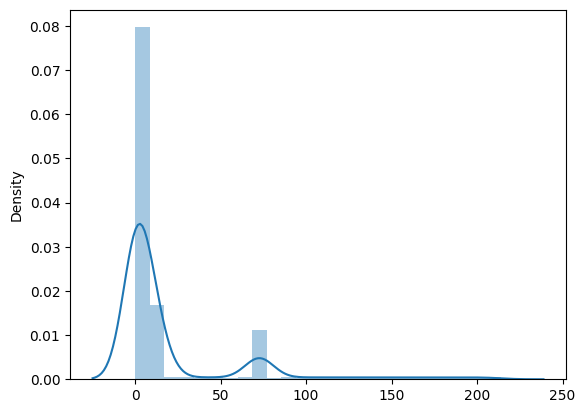

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(glass_df.unstack(), 25)

In [6]:
glass_df.unstack()

0   0      1.0
    1      2.0
    2      3.0
    3      4.0
    4      5.0
          ... 
10  209    7.0
    210    7.0
    211    7.0
    212    7.0
    213    7.0
Length: 2354, dtype: float64

In [7]:
glass_df.shape

(214, 11)

In [8]:
glass_df[10].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: 10, dtype: int64

In [9]:
# Now lets combine classes 1 to 4 and classes 5 to 7 and label them as window glass and non-window glass


glass_df[10] = glass_df[10].replace(1,'Window Glass')
glass_df[10] = glass_df[10].replace(2,'Window Glass')
glass_df[10] = glass_df[10].replace(3,'Window Glass')
glass_df[10] = glass_df[10].replace(5,'Non-Window Glass')
glass_df[10] = glass_df[10].replace(6,'Non-Window Glass')
glass_df[10] = glass_df[10].replace(7,'Non-Window Glass')
glass_df[10].value_counts()

Window Glass        163
Non-Window Glass     51
Name: 10, dtype: int64

In [10]:
import plotly.figure_factory as ff
corrs = glass_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

In [11]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(glass_df.drop(10,axis=1), glass_df[10], test_size=.30, random_state=123)
X_train.shape,X_test.shape

((149, 10), (65, 10))

In [14]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

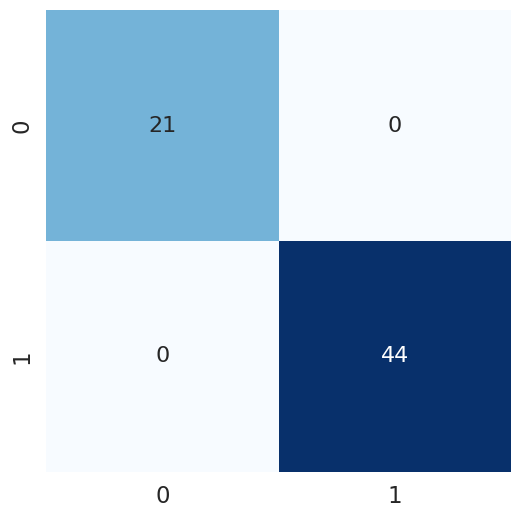

In [15]:
# Function to create a confusion matrix
def conf_matrix(y_test, pred_test):

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
#Ploting the confusion matrix
conf_matrix(y_test, pred_test)